In [1]:
from __future__ import print_function
import tensorflow as tf
import numpy
import numpy.random as rng
import matplotlib.pyplot as plt

In [2]:
# get training data and length of training data
train_x = numpy.asarray([3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167,7.042,10.791,5.313,7.997,5.654,9.27,3.1])
train_y = numpy.asarray([1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,2.53,1.221,2.827,3.465,1.65,2.904,2.42,2.94,1.3])

train_count = train_x.shape[0]

In [3]:
# define variables
X = tf.placeholder('float')
Y = tf.placeholder('float')

ow = rng.randn()
w = tf.Variable(ow, name="weight")
ob = rng.randn()
b = tf.Variable(ob, name="bias")

In [4]:
# Create linear model with variables and placeholders
model = w * X + b
# alternatively: model = tf.add(tf.multiply(X, w), b)

In [5]:
# Create cost function to train model against
cost = tf.reduce_sum(tf.pow(model - Y, 2)) / (2 * train_count)

In [6]:
# Create optimizer that will adjust model's variables based on value of cost function
learning_rate = 0.02

optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

In [7]:
# Initialize variables
init = tf.global_variables_initializer()

Trained cost=0.0771694853902
Starting Weight=-1.56005592648 	Optimized Weight=0.248960524797
Starting Bias=0.428951450919   	Optimized Bias=0.794434607029
Prediction for 5.24 = 2.09898781776


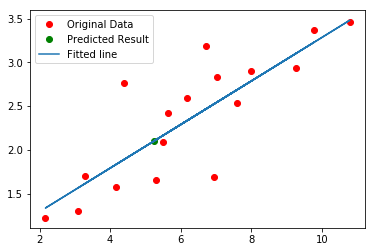

In [8]:
training_cycles = 1000
with tf.Session() as sess:
    sess.run(init)
    
    # Optimize variables from training data
    for i in range(training_cycles):
        for (x, y) in zip(train_x, train_y):
            sess.run(optimizer, feed_dict={X: x, Y: y})
    
    training_cost = sess.run(cost, feed_dict={X: train_x, Y: train_y})
    print("Trained cost={}".format(training_cost))
    print("Starting Weight={} \tOptimized Weight={}".format(ow, sess.run(w)))
    print("Starting Bias={}   \tOptimized Bias={}".format(ob, sess.run(b)))
    
    pred_y = sess.run(model, feed_dict={X: 5.24})
    print("Prediction for 5.24 = {}".format(pred_y))
    
    plt.plot(train_x, train_y, 'ro', label="Original Data")
    plt.plot(5.24, pred_y, 'go', label="Predicted Result")
    plt.plot(train_x, sess.run(w) * train_x + sess.run(b), label="Fitted line")
    plt.legend()
    plt.show()
    

    